# Summary: 
The complete Shakya et al. dataset and subsamples of this dataset (10%, 25%, and 50%) were trimmed at quality scores of 2 and 30 using trimmomatic and classified with sourmash gather. All sourmash signatures were calculated with --scaled values of 10000, k values of 21, 31 and 51, and abundance tracking. Classifiication was performed with both genbank and refseq databases created in may of 2017.

The data used in this notebook is  stored on the open science framework 
(https://osf.io/dm938/) in the taxonomic_classification/sourmash directory. 


# Example Use Case:
In this example, the complete Shakya et al. 2013 metagenome is being compared to small, medium, and large subsamples of itself after conservative or aggressive read filtering. The datasets used in this example are named according to their metagenome content and relative degree of read filtering:

* SRR606249 = Accession number for the complete Shakya et al. 2013 metagenome
* subset50 = 50% of the complete Shakya et al. 2013 metagenome
* subset25 = 25% of the complete Shakya et al. 2013 metagenome
* subset10 = 10% of the complete Shakya et al. 2013 metagenome
* pe.trim2 = Conservative read filtering
* pe.trim30 = Aggressive read filtering
* megahit = MEGHIT assembly 
* spades = SPAdes assembly 


# Objectives:

* To determine how both conservative and aggresive quality trimming of reads affects classification results 
* To determine what fraction of the dataset is required to detect all these genomes
* To compare resutls of taxonomic classification from reads and contigs

In [24]:
from taxa import *

In [25]:
combined_df = concat_sourmash_csv("*.gather.output.csv")

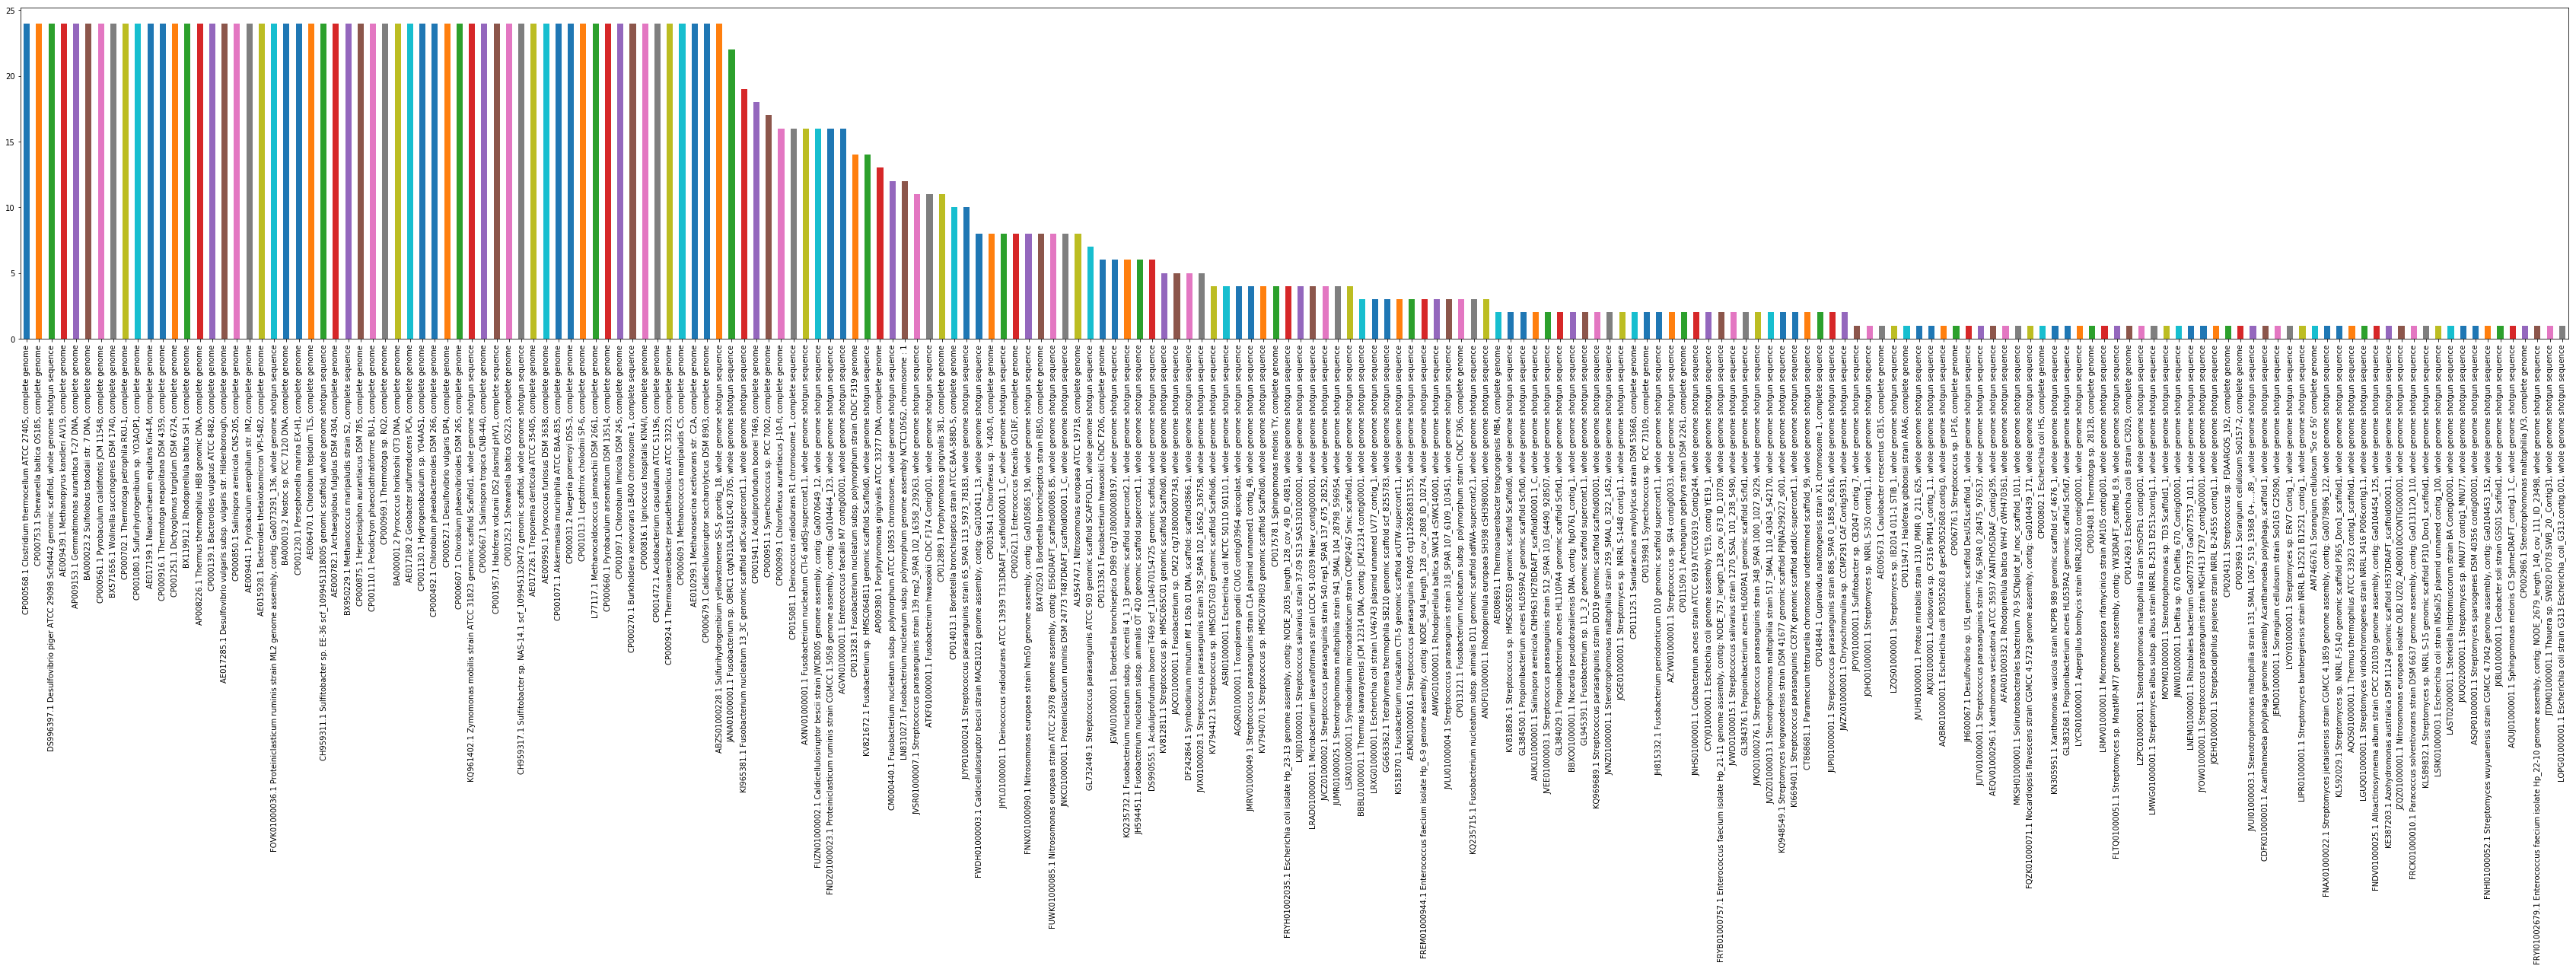

In [26]:
# Visual representation of all of the OTUs detected at in the complete and subsampled datasets, and k values of pof 
plot_otu_presence_absence("*.gather.output.csv")

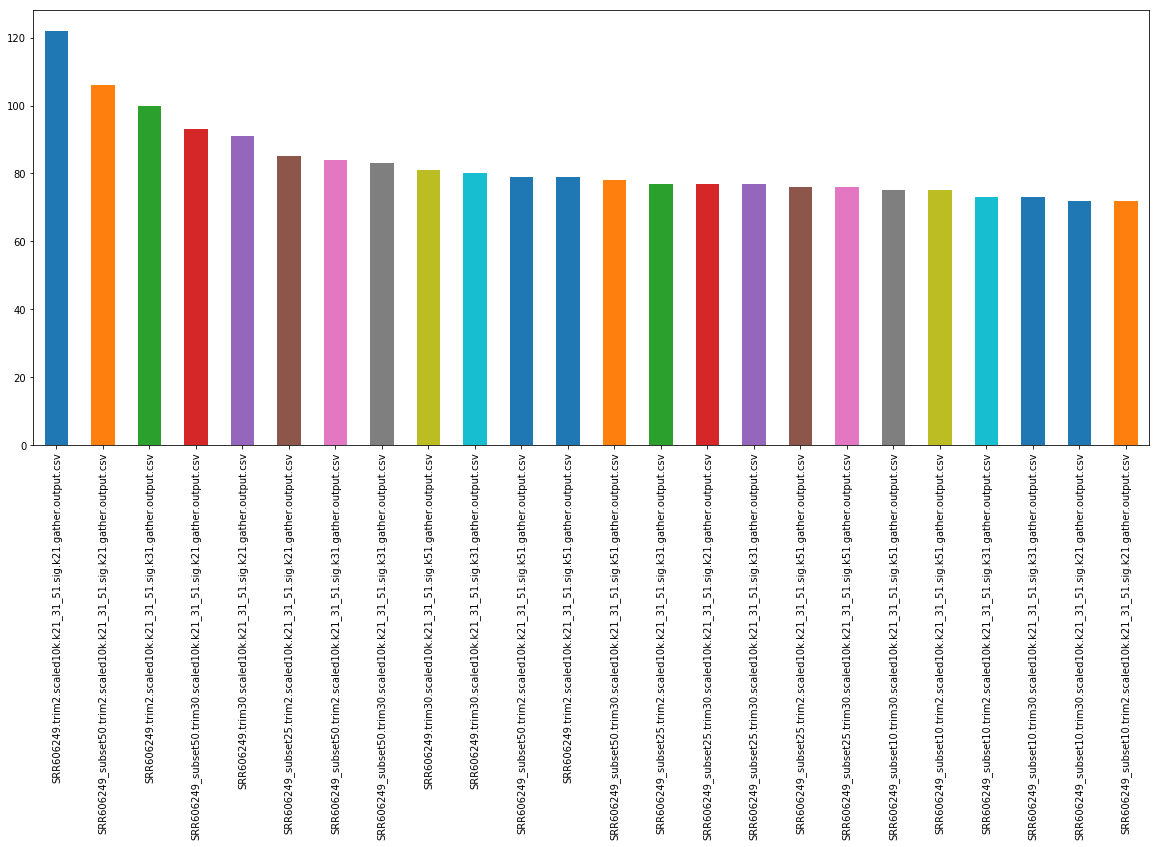

In [27]:
combined_df['filename'].value_counts().plot(kind="bar", figsize = (20,8))

In [28]:
create_sourmash_presence_absence_table("*.gather.output.csv")#.to_csv("gather_k21_31_51.csv")

,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k31.gather.output.csv,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k51.gather.output.csv,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k51.gather.output.csv,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k51.gather.output.csv,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k31.gather.output.csv,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k51.gather.output.csv,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k21.gather.output.csv,SRR606249.trim30.scaled10k.k21_31_51.sig.k21.gather.output.csv,SRR606249.trim2.scaled10k.k21_31_51.sig.k21.gather.output.csv,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k31.gather.output.csv,...,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k21.gather.output.csv,SRR606249_subset25.trim2.scaled10k.k21_31_51.sig.k21.gather.output.csv,SRR606249_subset25.trim30.scaled10k.k21_31_51.sig.k21.gather.output.csv,SRR606249_subset10.trim30.scaled10k.k21_31_51.sig.k51.gather.output.csv,SRR606249_subset50.trim30.scaled10k.k21_31_51.sig.k51.gather.output.csv,SRR606249.trim30.scaled10k.k21_31_51.sig.k51.gather.output.csv,SRR606249_subset50.trim2.scaled10k.k21_31_51.sig.k21.gather.output.csv,SRR606249_subset10.trim2.scaled10k.k21_31_51.sig.k21.gather.output.csv,SRR606249.trim30.scaled10k.k21_31_51.sig.k31.gather.output.csv,SRR606249.trim2.scaled10k.k21_31_51.sig.k51.gather.output.csv
"JUMR01000025.1 Stenotrophomonas maltophilia strain 941_SMAL 104_28798_596954, whole genome shotgun sequence",False,False,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
"AXNV01000001.1 Fusobacterium nucleatum CTI-6 addSJ-supercont1.1, whole genome shotgun sequence",False,True,True,True,False,True,True,True,True,False,...,True,True,True,True,True,True,True,True,False,True
"DS990555.1 Aciduliprofundum boonei T469 scf_1104670154725 genomic scaffold, whole genome shotgun sequence",False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
"AE009950.1 Pyrococcus furiosus DSM 3638, complete genome",True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
"AUKL01000001.1 Salinispora arenicola CNH963 H278DRAFT_scaffold00001.1_C, whole genome shotgun sequence",True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
"CT868681.1 Paramecium tetraurelia chromosome undetermined scaffold_99, whole genome shotgun sequence",False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
"CP000660.1 Pyrobaculum arsenaticum DSM 13514, complete genome",True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
"KI669401.1 Streptococcus parasanguinis CC87K genomic scaffold addUc-supercont1.1, whole genome shotgun sequence",False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
"AE010299.1 Methanosarcina acetivorans str. C2A, complete genome",True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
"BA000001.2 Pyrococcus horikoshii OT3 DNA, complete genome",True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


### The steps below require numpy version 1.10 or greater

In [29]:
np.version.version

'1.14.5'

### Visualizing OTUs in a prensence/absence table 
[qgrid](https://github.com/quantopian/qgrid) enables us to visualize and manipulate dataframes using an ipython widget.

In [30]:
interactive_table_abricate("*.gather.output.csv")

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Visualizing OTUs in a clustermap
[clustergrammer](http://amp.pharm.mssm.edu/clustergrammer/) enables us to visualize and manipulate dataframes using an ipython widget.

In [23]:
interactive_map_sourmash("*.gather.output.csv")

clustergrammer_widget(network='{"row_nodes": [{"name": "JUMR01000025.1 Stenotrophomonas maltophilia strain 941…